In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-top-100/top2018.csv


## Importing the data

In [2]:
pd.get_option("display.max_columns")
df = pd.read_csv("/kaggle/input/spotify-top-100/top2018.csv")
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


## Checking the Datatypes

In [3]:
df.dtypes

id                   object
name                 object
artists              object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

In [4]:
df.describe(include="all")

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100,100,100,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
unique,100,100,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,09IStsImFySgyp0pIQdqA,Freaky Friday (feat. Chris Brown),Post Malone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,NaN,NaN,NaN,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,NaN,NaN,NaN,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,NaN,NaN,NaN,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,NaN,NaN,NaN,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,NaN,NaN,NaN,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00


In [5]:
df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

## Finding which Artist had most TOP 100 songs

In [6]:
art = df.groupby("artists")["artists"].count().sort_values(ascending=False)
art.head()

artists
Post Malone     6
XXXTENTACION    6
Drake           4
Ed Sheeran      3
Marshmello      3
Name: artists, dtype: int64

These are the TOP 5 artist who had most TOP 100 songs. Post Malone and XXXTENTACTION has 6 songs.

In [7]:
## Converting it to a dataframe
art = art.to_frame()

In [8]:
art.head()

,artists
artists,
Post Malone,6
XXXTENTACION,6
Drake,4
Ed Sheeran,3
Marshmello,3


In [9]:
artist=art.rename(columns={"artists":"artists","artists":"count"})
artist.head(10) # Viewing the top 10 artists

,count
artists,
Post Malone,6
XXXTENTACION,6
Drake,4
Ed Sheeran,3
Marshmello,3
Dua Lipa,2
Imagine Dragons,2
Ozuna,2
Selena Gomez,2


#### Reseting the index

In [10]:
artist = artist.reset_index()

In [11]:
top10artist = artist.head(10)
top10artist

,artists,count
0,Post Malone,6
1,XXXTENTACION,6
2,Drake,4
3,Ed Sheeran,3
4,Marshmello,3
5,Dua Lipa,2
6,Imagine Dragons,2
7,Ozuna,2
8,Selena Gomez,2
9,Clean Bandit,2


In [12]:
# importing matplotlib for plotting
import matplotlib.pyplot as plt

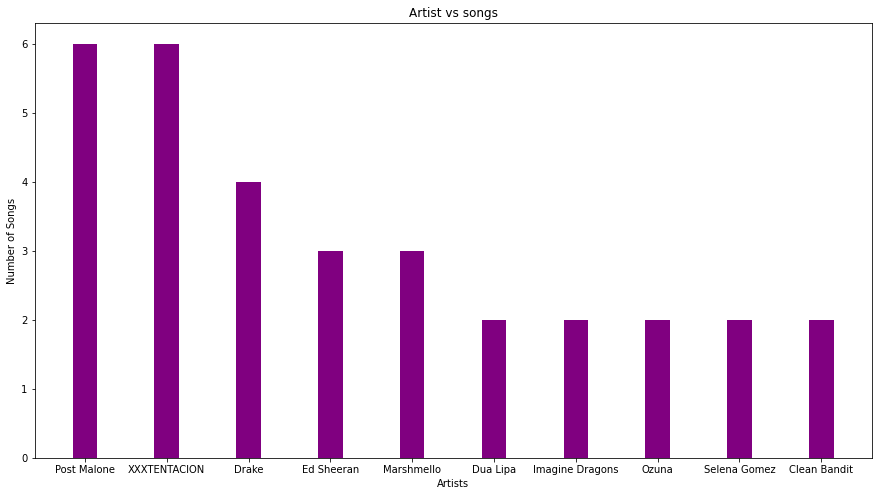

In [13]:
fig = plt.figure(figsize=(15,8))
plt.bar(top10artist["artists"],top10artist["count"],color="purple",width=0.3)
plt.xlabel("Artists")
plt.ylabel("Number of Songs")
plt.title("Artist vs songs")
plt.show()

Exporting top10artist dataframe to CSV format 

In [14]:
top10artist.to_csv("Top 10 artist.csv",index=None)

## Checking the Correlation


<AxesSubplot:>

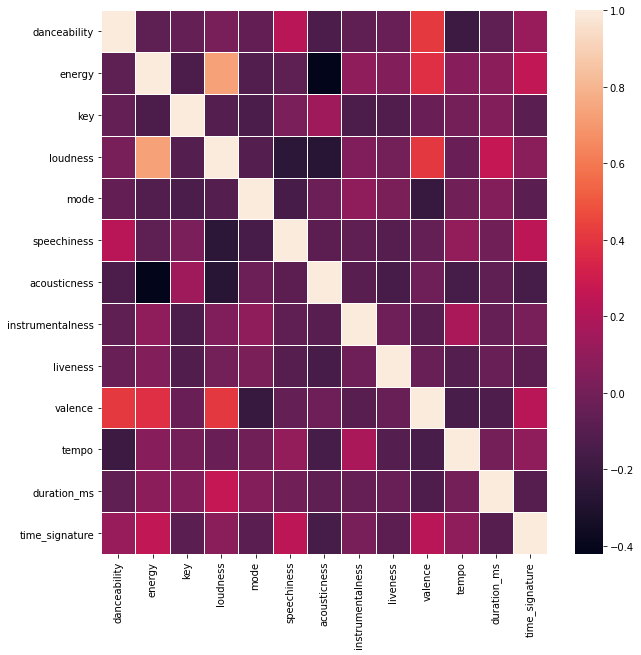

In [15]:
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,linewidths=.5, ax=ax)

In [16]:
# viewing the columns of the dataframe
df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

## Checking the artist with their max danceability, energy, key, loudness

### Danceability

In [17]:
dan=df.groupby(["artists"])["danceability"].max().sort_values(ascending=False)
dan.head()

artists
Lil Baby        0.964
6ix9ine         0.931
BlocBoy JB      0.922
XXXTENTACION    0.921
Drake           0.912
Name: danceability, dtype: float64

In [18]:
##converting dan to a dataframe
dan=dan.to_frame()
# Resetting the index
dan = dan.reset_index()
dan

,artists,danceability
0,Lil Baby,0.964
1,6ix9ine,0.931
2,BlocBoy JB,0.922
3,XXXTENTACION,0.921
4,Drake,0.912
...,...,...
65,DJ Khaled,0.552
66,Juice WRLD,0.511
67,Billie Eilish,0.351
68,Keala Settle,0.284


In [19]:
top10dan=dan.head(10)
top10dan

,artists,danceability
0,Lil Baby,0.964
1,6ix9ine,0.931
2,BlocBoy JB,0.922
3,XXXTENTACION,0.921
4,Drake,0.912
5,Migos,0.909
6,Wolfine,0.909
7,Kendrick Lamar,0.908
8,Nio Garcia,0.903
9,Tyga,0.884


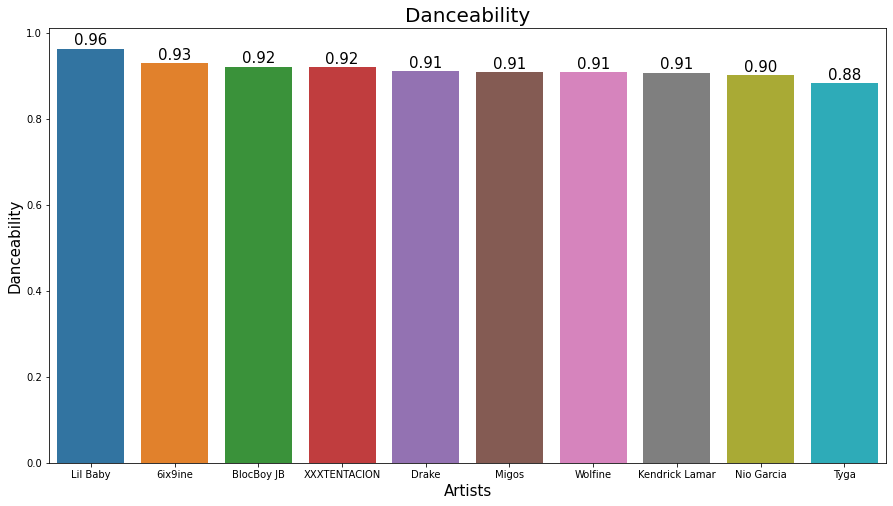

In [20]:
figure = plt.figure(figsize=(15,8))
plots=sns.barplot(x="artists",y="danceability",data=top10dan)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Artists",size=15)
plt.ylabel("Danceability",size=15)
plt.title("Danceability",size=20)
plt.show()

In [21]:
# Exporting it to CSV file
top10dan.to_csv("Top 10 danceability.csv",index=False)

### Energy

In [22]:
ene = df.groupby(["artists"])["energy"].max().sort_values(ascending=False)
ene

artists
Drake            0.909
Sofia Reyes      0.895
Luis Fonsi       0.889
Marshmello       0.880
Calvin Harris    0.862
                 ...  
Offset           0.428
6ix9ine          0.387
Sam Smith        0.375
Lil Baby         0.346
Billie Eilish    0.296
Name: energy, Length: 70, dtype: float64

In [23]:
#converting it to a dataframe

ene = ene.to_frame()

#reseting the index

ene = ene.reset_index()

ene

,artists,energy
0,Drake,0.909
1,Sofia Reyes,0.895
2,Luis Fonsi,0.889
3,Marshmello,0.880
4,Calvin Harris,0.862
...,...,...
65,Offset,0.428
66,6ix9ine,0.387
67,Sam Smith,0.375
68,Lil Baby,0.346


In [24]:
# Viewing the top 10 artists
top10ene = ene.head(10)
top10ene

,artists,energy
0,Drake,0.909
1,Sofia Reyes,0.895
2,Luis Fonsi,0.889
3,Marshmello,0.880
4,Calvin Harris,0.862
5,Bruno Mars,0.859
6,5 Seconds of Summer,0.854
7,Daddy Yankee,0.848
8,Ti?sto,0.834
9,Imagine Dragons,0.822


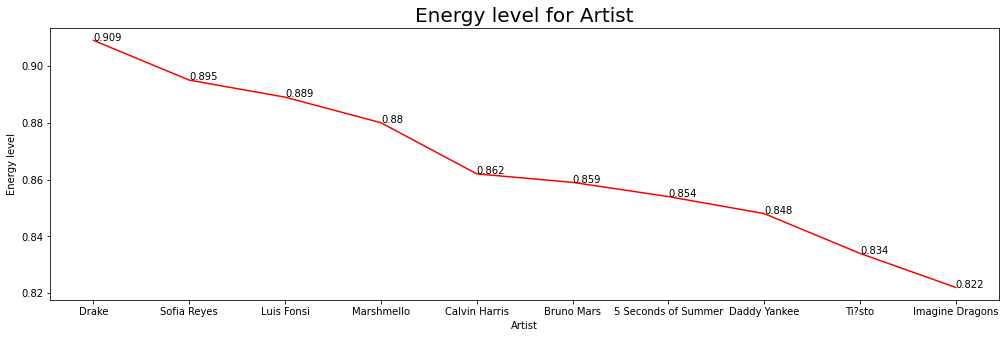

In [25]:
figure = plt.figure(figsize=(17,5))
ax = figure.add_subplot(111)
plt.plot(top10ene["artists"],top10ene["energy"],color="red")
for i,j in top10ene.energy.items():
    ax.annotate(str(j), xy=(i, j))
plt.xlabel("Artist")
plt.ylabel("Energy level")
plt.title("Energy level for Artist",size=20)
plt.show()

In [26]:
#Exporting it to a csv file
top10ene.to_csv("Top 10 energy.csv",index=False)

In [27]:
df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

### Key, speechiness and acousticness

In [28]:
kla=df.groupby(["artists"])["key","speechiness","acousticness"].max().sort_values(by=["key","speechiness"],ascending=False)
top10kla = kla.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [29]:
top10kla=top10kla.reset_index()

In [30]:
top10kla

,artists,key,speechiness,acousticness
0,XXXTENTACION,11.0,0.2420,0.88300
1,Lil Uzi Vert,11.0,0.2310,0.00264
2,Nio Garcia,11.0,0.2140,0.54200
3,Rich The Kid,11.0,0.1430,0.20200
4,Calvin Harris,11.0,0.1100,0.03700
5,Selena Gomez,11.0,0.0486,0.12900
6,Becky G,11.0,0.0464,0.35400
7,Clean Bandit,11.0,0.0456,0.24500
8,ZAYN,11.0,0.0390,0.10100
9,Dean Lewis,11.0,0.0362,0.69700


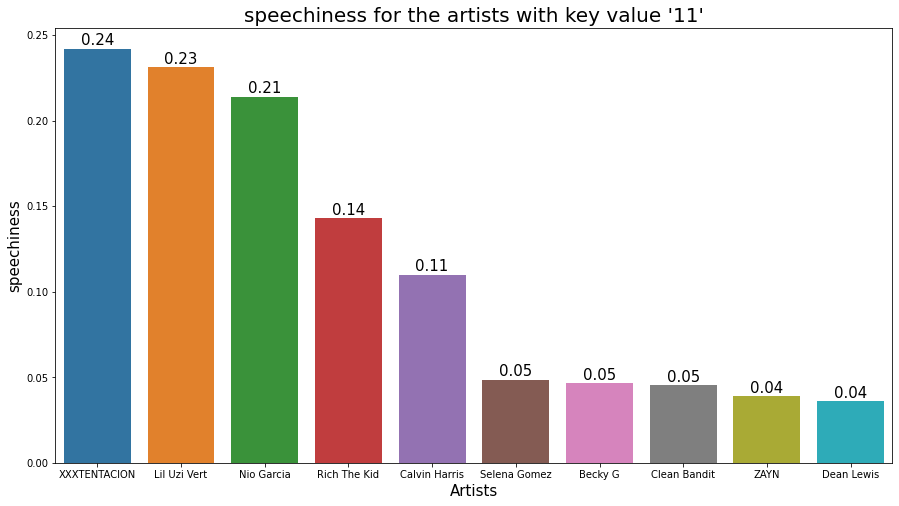

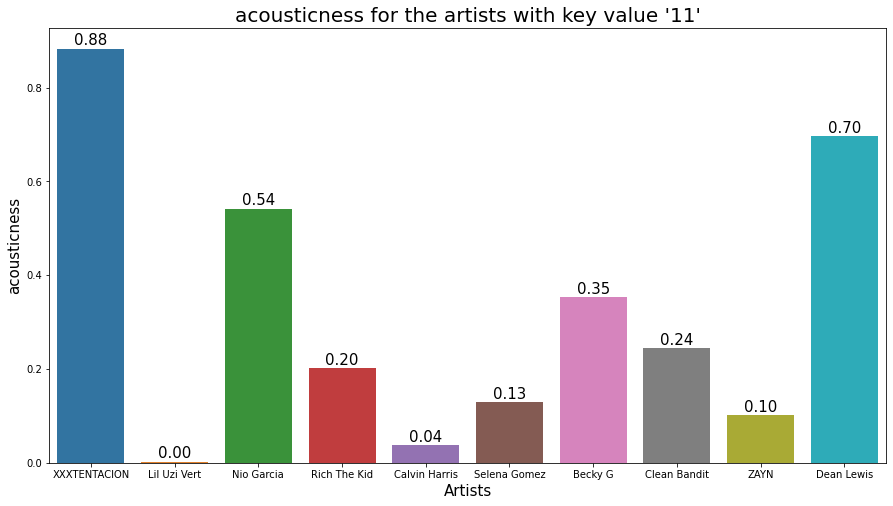

In [31]:
figure = plt.figure(figsize=(15,8))
plots=sns.barplot(x="artists",y="speechiness",data=top10kla)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Artists",size=15)
plt.ylabel("speechiness",size=15)
plt.title("speechiness for the artists with key value \'11\'",size=20)
plt.show()

print("\n\n")

figure = plt.figure(figsize=(15,8))
plots=sns.barplot(x="artists",y="acousticness",data=top10kla)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Artists",size=15)
plt.ylabel("acousticness",size=15)
plt.title("acousticness for the artists with key value \'11\'",size=20)
plt.show()

## Mode

In [32]:
mode = df['mode'].value_counts()
mode

1.0    59
0.0    41
Name: mode, dtype: int64

In [33]:
mode=mode.to_frame()
mode=mode.reset_index()
mode=mode.rename(columns={"index":"mode","mode":"count"})

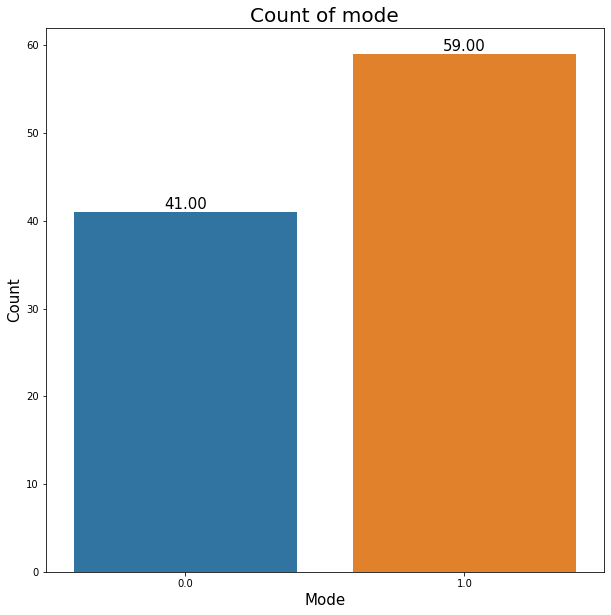

In [34]:
figure = plt.figure(figsize=(10,10))
plots=sns.barplot(x="mode",y="count",data=mode)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Mode",size=15)
plt.ylabel("Count",size=15)
plt.title("Count of mode",size=20)
plt.show()

In [35]:
# Exporting mode to csv
mode.to_csv("Count of mode.csv",index=False)

In [36]:
df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

## Liveness

In [37]:
live=df.groupby(["artists"])["liveness"].mean().sort_values(ascending=False)
top10live = live.head(10)

In [38]:
# Converting it to dataframe
top10live = top10live.to_frame()

#reseting the dataframe's index
top10live = top10live.reset_index()

In [39]:
# Converting the values to percentage
for i in range (0,len(top10live)):
    top10live["liveness"][i] = top10live["liveness"][i]*100
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


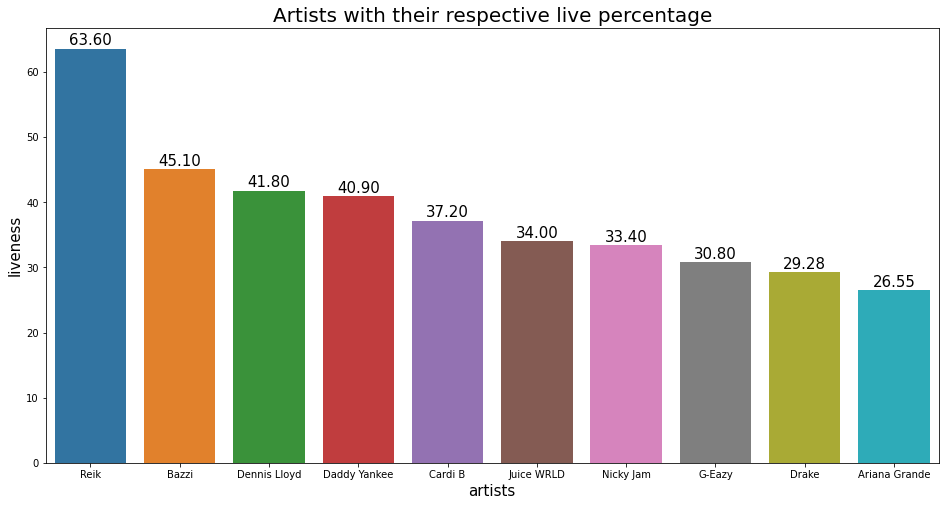

In [40]:
figure = plt.figure(figsize=(16,8))
plots=sns.barplot(x="artists",y="liveness",data=top10live)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("artists",size=15)
plt.ylabel("liveness",size=15)
plt.title("Artists with their respective live percentage",size=20)
plt.show()

In [41]:
# Exporting to csv format
top10live.to_csv("Top 10 live.csv",index=False)

## Valence

In [42]:
val=df.groupby(["artists"])["valence"].mean().sort_values(ascending=False)
top10val = val.head(10)

In [43]:
# changing it to dataframe
top10val=top10val.to_frame()

# resetting their indexes

top10val = top10val.reset_index()

In [44]:
top10val

,artists,valence
0,Bruno Mars,0.926
1,Wolfine,0.844
2,Natti Natasha,0.839
3,Piso 21,0.839
4,Daddy Yankee,0.828
5,Becky G,0.820
6,Sofia Reyes,0.794
7,Reik,0.768
8,Lil Dicky,0.755
9,Portugal. The Man,0.754


In [45]:
for i in range (0,len(top10val)):
    top10val["valence"][i] = top10val["valence"][i]*100
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


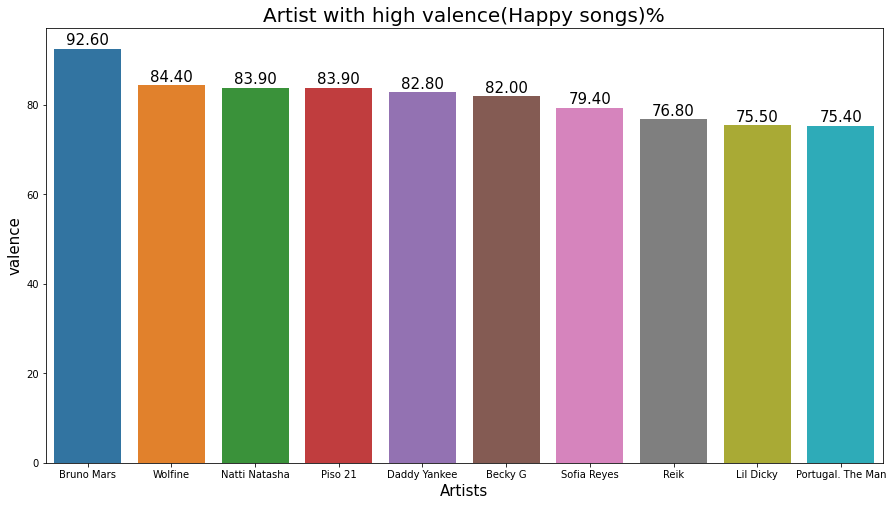

In [46]:
figure = plt.figure(figsize=(15,8))
plots=sns.barplot(x="artists",y="valence",data=top10val)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Artists",size=15)
plt.ylabel("valence",size=15)
plt.title("Artist with high valence(Happy songs)%",size=20)
plt.show()

In [47]:
# Exporting to csv format

top10val.to_csv("Top 10 Valence.csv",index=False)

In [48]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0
